In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

In [3]:
house_price = pd.read_csv(r'C:\Users\User\Desktop\kc_house_data.csv')

In [4]:
pd.set_option('max_columns' , None)

In [5]:
house_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
house_price.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
house_price['date'] = house_price['date'].astype('datetime64')

In [9]:
house_price['waterfront'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

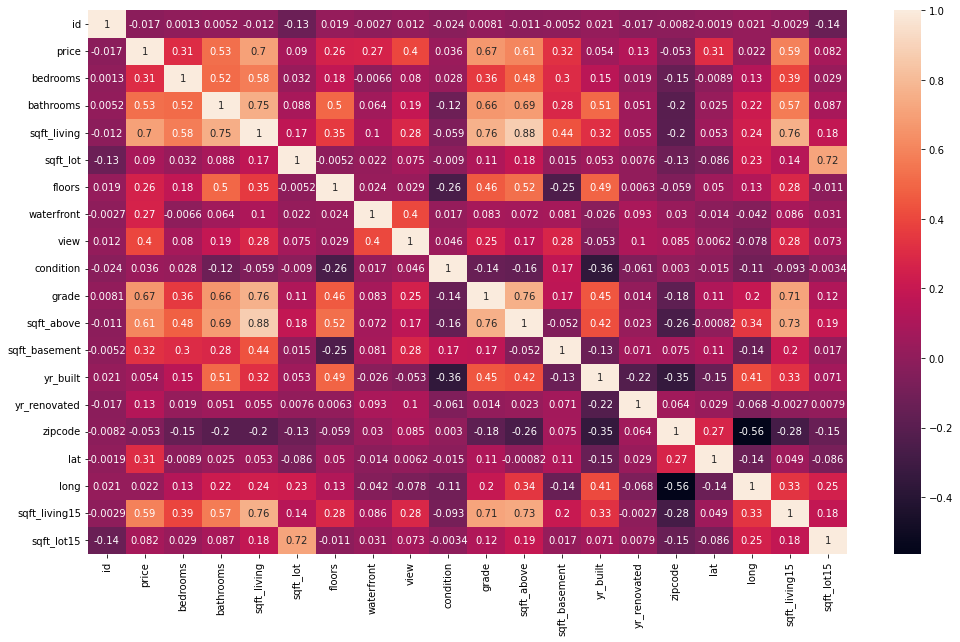

In [10]:
plt.figure(figsize = (17,10))
sns.heatmap(house_price.corr() , annot = True)

# Remove id , date , zipcode , lat , long

In [11]:
house_price = house_price.drop(columns = ['id' , 'date' , 'zipcode' , 'lat' , 'long'] , axis = 1)

In [12]:
house_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [13]:
x = house_price.drop(['price'] , axis = 1)
y = house_price['price']

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2)

# Linear Model

In [15]:
linear = LinearRegression()
linear.fit(x_train , y_train)
lin_predict =linear.predict(x_test)

In [16]:
r2_score(y_test , lin_predict)

0.6463267198689217

# Decission Model

In [17]:
decision = DecisionTreeRegressor()
decision.fit(x_train , y_train)
dec_predict = decision.predict(x_test)

In [18]:
r2_score(y_test , dec_predict)

0.5076234142605525

# Super Vector model

In [19]:
sup = SVR()

In [20]:
sup.fit(x_train , y_train)

SVR()

In [21]:
sup_predict = sup.predict(x_test)

In [22]:
r2_score(y_test , sup_predict)

-0.05703611150346655

# Lasso model

In [23]:
lasso = Lasso()

In [24]:
lasso.fit(x_train , y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382501309644462.6, tolerance: 241371388812.03592
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [25]:
lasso_predict = lasso.predict(x_test)

In [26]:
r2_score(y_test , lasso_predict)

0.6463324259894192

# Random Forest Model

In [27]:
ran = RandomForestRegressor()

In [28]:
ran.fit(x_train , y_train)

RandomForestRegressor()

In [29]:
ran_predict = ran.predict(x_test)

In [30]:
ran_predict2 = ran.predict(x)

In [31]:
ran_predict2

array([266755.76, 558452.5 , 293816.  , ..., 363008.72, 396650.  ,
       328860.17])

In [32]:
ran_predict2.shape

(21613,)

In [33]:
r2_score(y_test , ran_predict)

0.7583127916003823

In [34]:
print(ran_predict.shape)

(4323,)


In [35]:
y.shape

(21613,)

In [36]:
print(y_test)

1072     1242500.0
3457      345950.0
8223      754000.0
8364      414500.0
19409     205000.0
           ...    
11044     280000.0
13454     432000.0
21556     553000.0
14610     309000.0
21104     585000.0
Name: price, Length: 4323, dtype: float64


In [37]:
ran_predict

array([1115516.7 ,  439857.4 ,  495381.5 , ...,  474122.74,  430358.47,
        621991.4 ])

In [38]:
data = pd.DataFrame({'Price': house_price.price    , 'Predict' : pd.Series(ran_predict2)})   

In [40]:
data.to_excel('House_price_predict.xlsx')

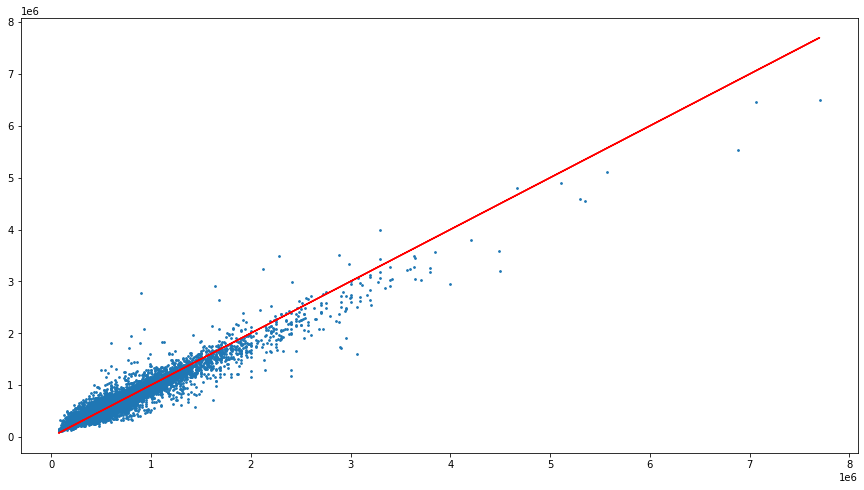

In [41]:
plt.figure(figsize = (15 , 8))
plt.scatter(house_price.price , ran_predict2 , s= 3)
plt.plot(house_price.price , house_price.price , color = 'red')